In [189]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
}
</style>
""")

# $$\textbf{Python Programming for Machine Learning} $$ 

#### $$\text{WiSe 2020/2021}$$

## $$\text{Lecture 3: Analyzing a dataset, Randomness, Linear Algebra} $$

#### $$\text{Sergej Dogadov} \quad \text{Philine Thalia Görzig} \quad \text{Panagiotis Tomer Karagiannis}$$

<center>
<img src='images/pyt.png' width=250>

# $$ \textbf{Analyzing a Dataset}$$
<hr> 

* $\text{Let's load the Boston Housing dataset}$ 

$\text{(506 examples composed of 13 features each with prices) from } \textbf{sklearn} \text{ package}.$
<br><br>
<center>
    <img src='./images/sklearn.png' width='300'>

In [9]:
import numpy as np

# conda install -c anaconda scikit-learn
from sklearn.datasets import load_boston

# Load Boston Housing dataset
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [10]:
X = boston['data'] # collect the data
print(X.shape)

(506, 13)


In [11]:
features = boston['feature_names']
features

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
descriptions = boston['DESCR']
print(descriptions)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## $$ \textbf{Dataset statistics}$$
<hr> 

In [14]:
# Global dataset mean feature value
print(f"Global mean: {X.mean():0.3f}")

# Mean of first feature (CRIM)
print(f"CRIM: {X[:, 0].mean():0.3f}" )

Global mean: 70.074
CRIM: 3.614


In [15]:
#Mean of all features over specific axis
means = X.mean(axis=0).round(3)

[print(f"{f}:\t {mu}" ) for f, mu in zip(features, means)];

CRIM:	 3.614
ZN:	 11.364
INDUS:	 11.137
CHAS:	 0.069
NOX:	 0.555
RM:	 6.285
AGE:	 68.575
DIS:	 3.795
RAD:	 9.549
TAX:	 408.237
PTRATIO:	 18.456
B:	 356.674
LSTAT:	 12.653


In [16]:
# Standard deviation of all features
stds = X.std(axis=0).round(1)
[print(f"{f}:\t {sigma}" ) for f, sigma in zip(features, stds)];

CRIM:	 8.6
ZN:	 23.3
INDUS:	 6.9
CHAS:	 0.3
NOX:	 0.1
RM:	 0.7
AGE:	 28.1
DIS:	 2.1
RAD:	 8.7
TAX:	 168.4
PTRATIO:	 2.2
B:	 91.2
LSTAT:	 7.1


In [17]:
# Extreme values

print(f"Min value: {X.min()} at position {X.argmin()}")      
print(f"Max value: {X.max()} at position {X.argmax()}") 

Min value: 0.0 at position 3
Max value: 711.0 at position 6353


* $\text{Retain two interesting features (5 and 12 columns)}$

$- \text{RM ->       average number of rooms per dwelling}$

$- \text{LSTAT ->    % lower status of the population}$

In [18]:
print(features[5], features[12])

X_sel = X[:, [5, 12]]
print(X_sel.shape)

RM LSTAT
(506, 2)


###  $$ \textbf{Scatter-plot the first two dimensions} $$
<hr>

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

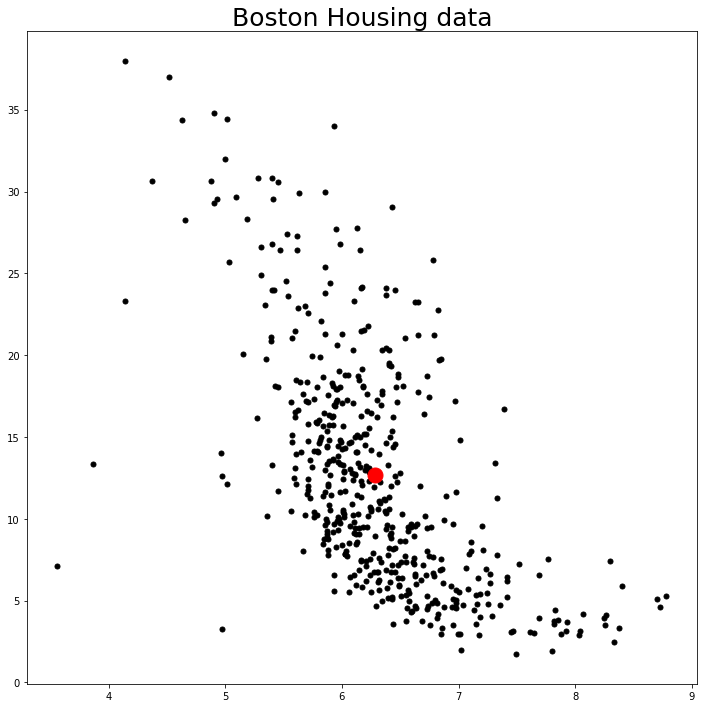

In [21]:
def plot_data(X, title='Boston Housing data'):

    plt.figure(figsize=(12, 12))
    
    #         x-coord, y-coord 
    plt.plot(X[:, 0],  X[:, 1], 'o', color='k', ms=5) #  X: (506, 2)

    # alternative way with the reference

    #plt.scatter(*X_sel.T, color='k', marker='.', s=12)

    plt.plot(X[:, 0].mean(), X[:, 1].mean(), 'o', color='red', ms=15)
    plt.title(title, fontsize=25)
    
plot_data(X_sel)

###  $$ \textbf{Normalize the data} $$
<hr>

In [23]:
#        506, 2    (2,)
X_norm = X_sel - X_sel.mean(axis=0) # center around origin (zero-mean)

X_norm /= X_sel.std(axis=0)  # rescale features so that they have standard deviation 1 in each dimension

d = X_norm.shape[1]
assert np.allclose(X_norm.mean(0), np.zeros(d))
assert np.allclose(X_norm.std(0), np.ones(d))

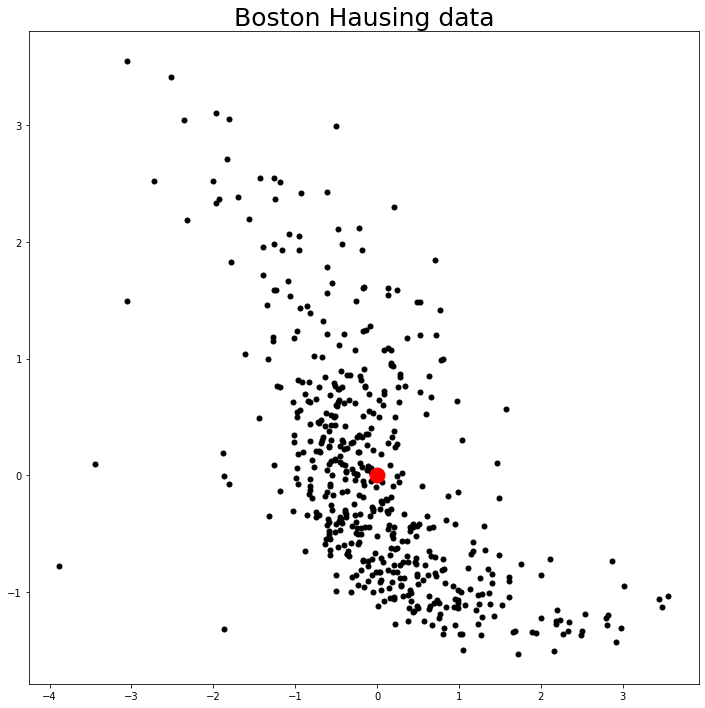

In [112]:
plot_data(X_norm)

###  $$ \textbf{Computing a distance matrix} $$
<hr>

In [25]:
import scipy.spatial

D = scipy.spatial.distance.cdist(X_norm, X_norm, metric='euclidean')
D.shape

(506, 506)

In [27]:
# Using broadcasting
from numpy import newaxis as na

#       (506, 1, 2)  -  (1, 506, 2) -> (506, 506, 2)
DD = np.sum( (X_norm[:, na]  - X_norm[na])**2, axis=2)**0.5

assert np.allclose(D, DD)

###  $$ \textbf{ Highlight the neighbouring datapoints} $$
<hr>

In [123]:
def highlight(X, D, min_dist=0.2, title='Boston Housing data'):
    
    plt.figure(figsize=(12, 12))
    idx = np.where(D < min_dist)

    plt.plot(*X.T, 'o', color='k', ms=5)
    plt.title(title, fontsize=20)
    
    for i1,i2 in zip(*idx):
        
        plt.plot([X[i1, 0], X[i2, 0]], [X[i1, 1], X[i2, 1]], color='red', alpha=0.25)

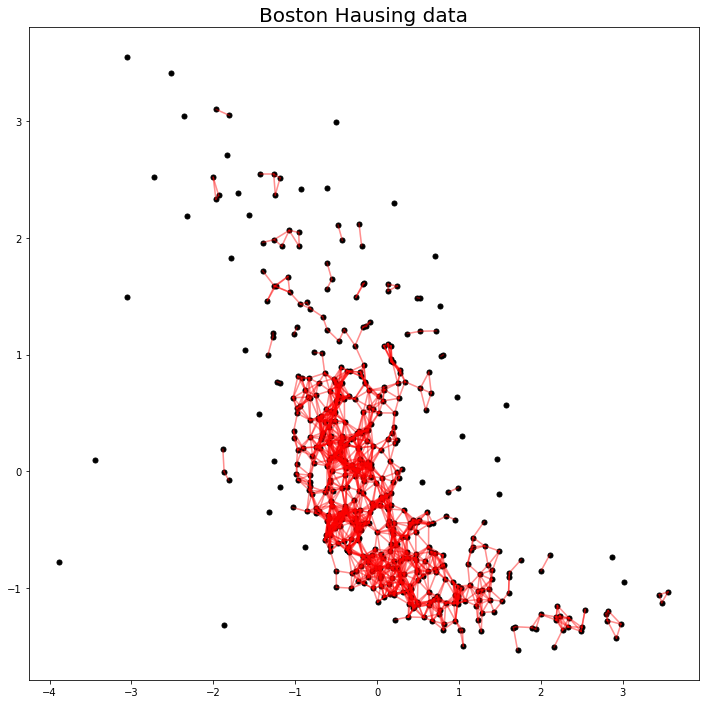

In [124]:
highlight(X_norm, D)

## $$\textbf{NumPy subpackage for random variables}$$
<hr>
<br>
<center>
    <img src='./images/dice.png' width='200'>

In [28]:
from numpy import random as rnd 

## $$\textbf{Sampling}$$
<hr>
<br>

* $\text{Draw random samples from a uniform distribution.}$

In [29]:
min_value = -1
max_value = 1
number_of_samples = 300

U = rnd.uniform(min_value, max_value, size=number_of_samples) # uniform samples in range (min_value, max_value)

f"Mean: {U.mean():.3f} Variance: {U.var():.2f} Std: {U.std():.2f}"

'Mean: 0.035 Variance: 0.34 Std: 0.59'

* $\text{Visualize 1-dim samples.}$

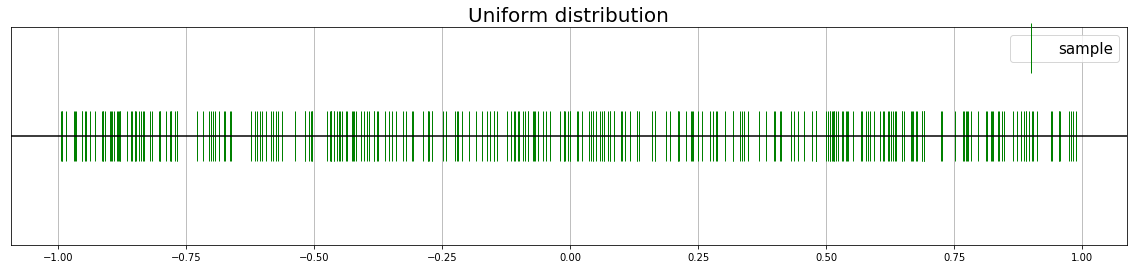

In [132]:
plt.figure(figsize=(20,4))
plt.title('Uniform distribution', fontsize=20)

plt.plot(U, np.zeros_like(U), '|', c='g', ms=50, label='sample')

plt.axhline(y = 0, color='k')
plt.grid(axis='x')

plt.legend(fontsize=15)
plt.yticks([]);

## $$\textbf{ Represent samples using the histogram plot}$$
<hr>
<br>

(array([ 8., 18.,  7.,  8.,  7.,  8.,  7., 11., 11., 10.,  7., 12.,  6.,
        16.,  9.,  7.,  7., 10., 12., 13., 12., 10.,  9., 11.,  9.,  7.,
        12., 13.,  4., 19.]),
 array([-0.9936322 , -0.92731428, -0.86099636, -0.79467844, -0.72836052,
        -0.6620426 , -0.59572468, -0.52940676, -0.46308885, -0.39677093,
        -0.33045301, -0.26413509, -0.19781717, -0.13149925, -0.06518133,
         0.00113659,  0.06745451,  0.13377243,  0.20009035,  0.26640827,
         0.33272619,  0.39904411,  0.46536203,  0.53167994,  0.59799786,
         0.66431578,  0.7306337 ,  0.79695162,  0.86326954,  0.92958746,
         0.99590538]))

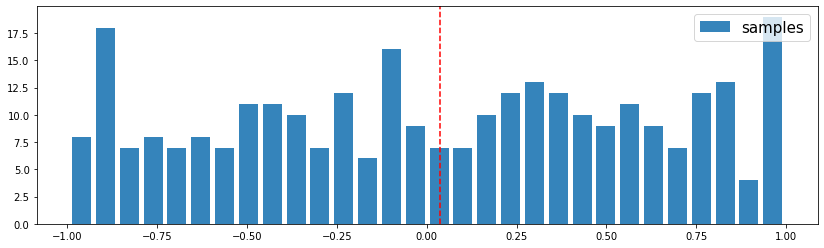

In [36]:
plt.figure(figsize=(14,4))

nums, ran, _ = plt.hist(U, bins=30, rwidth=0.8, alpha=0.9, label='samples') # num of bins, block width percentage

plt.axvline(x=U.mean(), ls='--',  c='r') # plot dashed mean line
plt.legend(fontsize=15);

nums, ran

In [37]:
# Equivalent in numpy: 
nums, ranges = np.histogram(U, bins=30)
nums, ranges

(array([ 8, 18,  7,  8,  7,  8,  7, 11, 11, 10,  7, 12,  6, 16,  9,  7,  7,
        10, 12, 13, 12, 10,  9, 11,  9,  7, 12, 13,  4, 19]),
 array([-0.9936322 , -0.92731428, -0.86099636, -0.79467844, -0.72836052,
        -0.6620426 , -0.59572468, -0.52940676, -0.46308885, -0.39677093,
        -0.33045301, -0.26413509, -0.19781717, -0.13149925, -0.06518133,
         0.00113659,  0.06745451,  0.13377243,  0.20009035,  0.26640827,
         0.33272619,  0.39904411,  0.46536203,  0.53167994,  0.59799786,
         0.66431578,  0.7306337 ,  0.79695162,  0.86326954,  0.92958746,
         0.99590538]))

## $$\textbf{Univariate-normal (Gaussian) distribution}$$
<hr>
<br>

In [40]:
# fix the random seed for debuging
np.random.seed(42)  # any value

In [44]:
mean = 2
std = 8

X = rnd.normal(loc=mean, scale=std, size=500)

f'Mean: {X.mean():.3f} Variance: {X.var():.2f} Std: {X.std():.2f}'

'Mean: 1.852 Variance: 68.87 Std: 8.30'

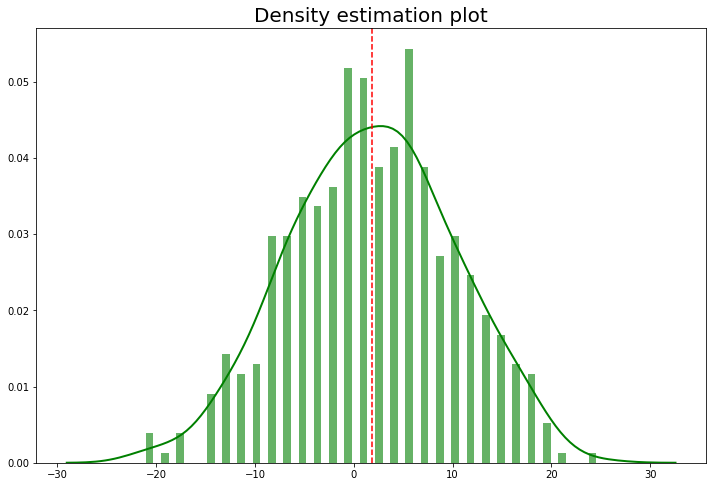

In [47]:
plt.figure(figsize=(12,8))

plt.hist(X, bins=30, density=True, alpha=0.6, rwidth=0.5, color='g')

from seaborn import kdeplot

kdeplot(X,linewidth=2, color='g') #
plt.title('Density estimation plot', fontsize=20)
plt.axvline(X.mean(), ls='--', c='r');

## $$\textbf{Multiple Gaussian distribution}$$
<hr>
<br>

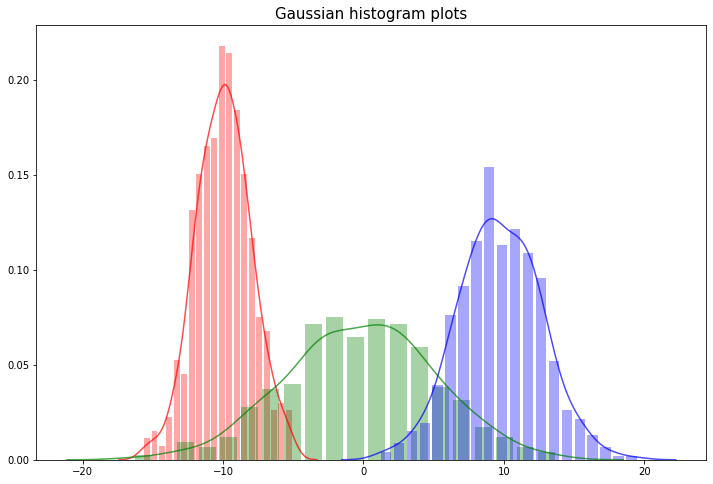

In [51]:
means = [-10, 0, 10]
stds = [2, 5, 3]
colors = ['r', 'g', 'b']

fig = plt.figure(figsize=(12,8))

for n, mu in enumerate(means): # given additionaly a counter back
    std = stds[n]
    col = colors[n]
    
    data = rnd.normal(mu, std, size=500)
    plt.hist(data, bins=20, color=col, alpha=0.35, rwidth=0.8, density=True)
    kdeplot(data, color=col, alpha=0.7)
    
_=plt.title('Gaussian histogram plots', fontsize=15)    

### $$\textbf{Gaussian histogram plot with subplots}$$
<hr>

In [52]:
def plot_gaussians(means, stds, size=250, bins=25):
    N = len(means)
    M = len(stds)
    
    fig, axis = plt.subplots(nrows=N, ncols=M, sharey=True, figsize=(20,14))

    R,C = axis.shape

    for r in range(R):
        for c in range(C):
            
            data = rnd.normal(means[r],stds[c], size=size)
            
            ax = axis[r,c]
            
            ax.hist(data, bins=bins, rwidth=0.8, density=True, color='g', alpha=0.5, label='data')
            ax.axvline(data.mean(), ls='--', c='r', ymax=.8, label='$\\mu =$'+f'{data.mean():0.2f}')
            
            ax.set_xticks(means) # plt.xticks([...])
            ax.legend()
            ax.grid(axis='y')
            
            kdeplot(data, ax=ax, color='k')
            
    ttl = axis[0,1].set_title('Gaussian histogram plots', fontsize=25)

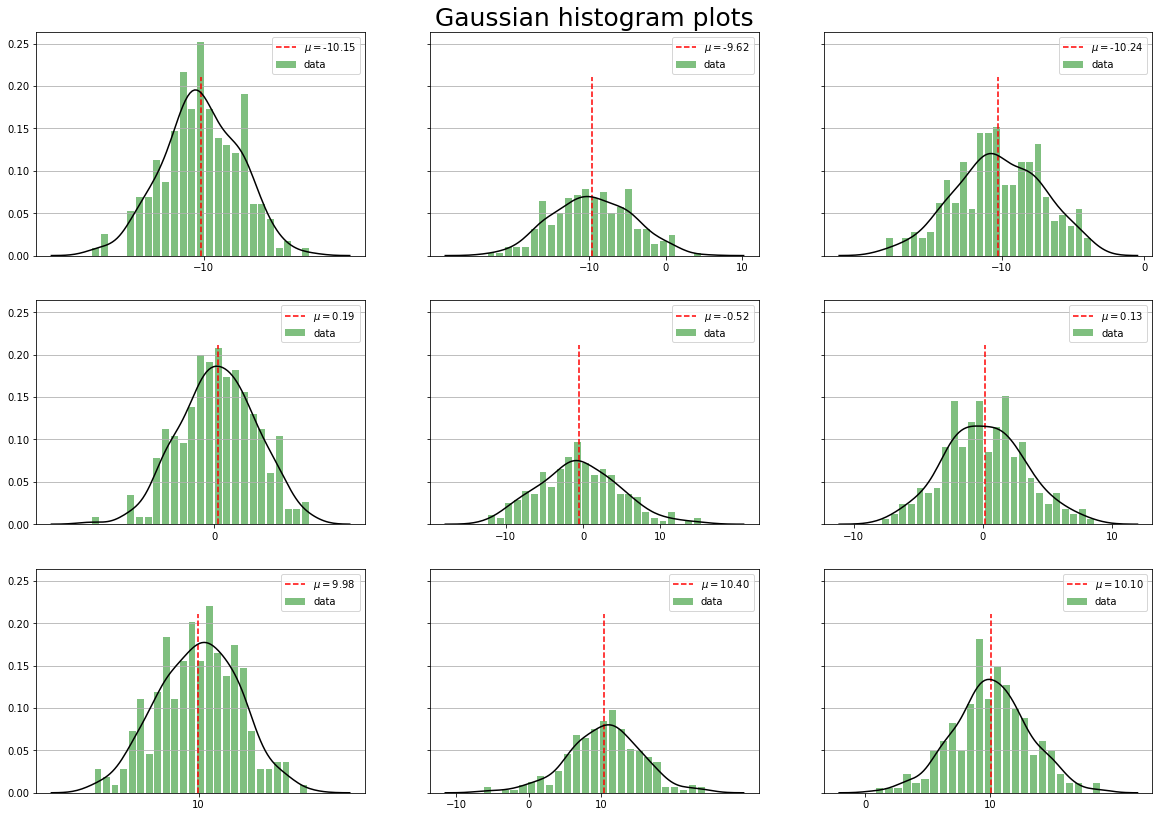

In [53]:
plot_gaussians(means,stds)

## $$\textbf{Probability density function}$$
<hr>
<br>

* $\text{Gaussian PDF}$

$$\boxed{\small{\mathcal{N}(x | \mu, \sigma)} = 
\frac{1}{\sigma\sqrt{2\pi}}\exp{\Big(-\frac{(x - \mu)^2}{2\sigma^2}\Big)}}$$

In [54]:
def gauss_pdf(X, mu=0, sigma=1):
    #                                           (N,d) - (d) = (N,d)
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(X - mu)**2/(2*sigma**2))

In [56]:
mean = 2
std = 4
X = np.sort(rnd.normal(loc=mean, scale=std, size=10000))

g_pdf = gauss_pdf(X, mean, std)
print(g_pdf.shape)

(10000,)


In [57]:
from scipy.stats import norm

n_pdf = norm.pdf(X, loc=mean, scale=std)
assert np.allclose(g_pdf, n_pdf)

### $$\textbf{Gaussian histogram plot}$$
<hr>

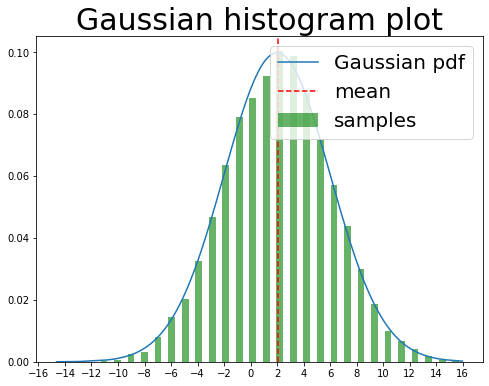

In [63]:
plt.figure(figsize=(8,6))
plt.hist(X, bins=30, density=True, alpha=0.6, rwidth=0.5, color='g', label='samples')

plt.plot(X, g_pdf, label='Gaussian pdf')

plt.xticks(np.arange(-16, 18, 2))
plt.axvline(X.mean(), ls='--', c='r', label='mean')

plt.title('Gaussian histogram plot', fontsize=30)
_=plt.legend(loc='upper right', fontsize=20)

## $$\textbf{Multinomial distribution}$$
<hr>

* $\text{Let's draw some random samples from a multinomial distribution. We'll use our fruits from the first lecture.}$
<br>
<center>
    <img src='./images/fruits.png', width='900'>

In [64]:
fruits = np.array([
    'watermelon',
    'apple',
    'grape',
    'grapefruit',
    'lemon',
    'banana',
    'cherry'
])

## $$\textbf{Sample from multinomial}$$
<hr>

In [67]:
n = 5 # number of samples

p = np.ones(len(fruits)).flatten()/len(fruits) # represents equal sampling probability

print(p)

all_fruits = np.tile(fruits, (n,1)) # repeat multiple (5) times to represent all possible picks
print(all_fruits)

print(50*'--')

mlt = rnd.multinomial(1, p, size=(5)) # draw multinomial samples 5 times with the given probability
print(mlt)

mlt = mlt.astype(bool)
print(mlt)

samples = all_fruits[mlt] # select drown samples from all fruits

[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]
[['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']]
----------------------------------------------------------------------------------------------------
[[0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0]]
[[False False False  True False False False]
 [False False  True False False False False]
 [False False  True False False False False]
 [False False False False False False  True]
 [ True False False False False False False]]


In [69]:
list(samples)

['grapefruit', 'grape', 'grape', 'cherry', 'watermelon']

## $$\textbf{Adjust selection probabilities}$$
<hr>

In [73]:
p = [0.05, 0.70, 0.05, 0.05, 0.05, 0.05, 0.05] # new probailities to pick a fruit
n = 1000

all_fruits = np.tile(fruits, (n,1))

mlt = rnd.multinomial(1, p, size=(n)) # draw multinomial samples 5 times with given probabilities
#print(mlt) # mask as 0 or 1 ints

samples = all_fruits[mlt.astype(bool)] # show drown samples
#print(list(samples))

np.mean(mlt.astype(bool), 0)

array([0.046, 0.696, 0.063, 0.04 , 0.051, 0.046, 0.058])

## $$\textbf{ Another way to make discrete choices}$$
<hr>

<center>
    <img src='./images/sampling.png', width='600'>

In [74]:
p = [0.05, 0.70, 0.05, 0.05, 0.05, 0.05, 0.05]

temp = [0] + p[:-1]
print(temp)

# Cumulate them
l = np.cumsum(temp) # lower-bounds
h = np.cumsum(p)            # upper-bounds

print(l)
print(h)

# Draw uniformly a number between 0 and 1
u = np.random.uniform(0, 1)

# Find which basket it belongs to
s = (u >= l) * (u < h) # np.logical_and(u > l, u < h) 

print(s) # sampled basket as a mask
# retrieve the label
fruits[np.argmax(s)]

[0, 0.05, 0.7, 0.05, 0.05, 0.05, 0.05]
[0.   0.05 0.75 0.8  0.85 0.9  0.95]
[0.05 0.75 0.8  0.85 0.9  0.95 1.  ]
[False False False  True False False False]


'grapefruit'

## $$\textbf{Linear Algebra}$$
<hr>
<br> 


#### $\textbf{Many machine learning techniques are based on linear algebra.}$ 

<br>

* $\text{Trace operator and matrix norms}$ 
<br>

* $\text{Solving a system of linear equations}$
<br>

* $\text{Singular value decomposiotion}$

## $$\textbf{Trace operator}$$
<hr>
<br> 

$$\Large{ 
tr(X) = \sum_{i=1}^N X_{ii}, \quad X \in \mathbb{R}^{(N,M)}
}$$
<hr>

* $\text{Usefull Properties}$:

$$\Large{ 
a = tr(a),\quad a \in \mathbb{R} 
}$$

$$\Large{ 
tr(A) + tr(B) = tr( A + B)
}$$

$$\Large{ 
tr(ABC) = tr(CAB) = tr(BCA) 
}$$

In [76]:
import numpy.random as rnd

X = rnd.normal(0, 1, size=(50,50)) #.reshape((50,50))

assert np.diag(X).sum() == np.trace(X)

In [77]:
a = 10

A = rnd.normal(0, 1, (10,20))
B = rnd.normal(0, 1, (20,10))
C = rnd.normal(0, 1, (10,10))

assert a == np.trace([[a]])

assert np.allclose(np.trace(A) + np.trace(B.T), np.trace(A + B.T)) 

assert np.allclose(np.trace(A @ B @ C),np.trace(C @ A @ B)) # A.dot(B) 
assert np.allclose(np.trace(C @ A @ B),np.trace(B @ C @ A))

## $$\textbf{Matrix norms}$$
<hr>
<br>  

* $\text{Frobenius norm with trace operator:}$

$$\Large{
|| X ||_{Fro} = \sqrt{tr(XX^{\top})}
}$$

In [78]:
l2_Fro = lambda X: np.trace(X @ X.T)**0.5

In [80]:
import numpy.linalg as la

X = rnd.normal(0,1, size=(10,20))

assert np.allclose(l2_Fro(X), la.norm(X, ord='fro')) # ord = {'inf', 'nuc', p-norm }

## $$\textbf{Sum of row vectors with Trace}$$
<hr>

$$\Large{X \in \mathbb{R}^{(N,D)} }$$

$$\Large{
y = \sum_{n=1}^N x_{n} x_n^{\top} = {\sum_{n=1}^N tr(x_n^{\top}x_n)} = tr{(X^{\top} X)}
}$$

In [81]:
X = rnd.normal(0,1, size=(10,20))

y = np.sum( [x @ x.T for x in X] )

print(y, np.trace(X.T @ X))

np.allclose(y, np.trace(X.T @ X), atol=1e-9)

170.39385699549504 170.39385699549504


True

## $$\textbf{Solving a system of linear equations}$$
<hr>

Like
$$\Large{
3x_0 + x1 = 9, \quad x_0 + 2x_1 = 8
}$$

or


$$\Large{ 
A X = B, \quad A = [[3,1],[1,2]] \quad B = [9,8]}$$

In [83]:
A = [
        [3,1],
        [1,2]
    ]

B = [9, 8]

X = la.solve(A, B)

print(B, A @ X)

assert np.allclose(A @ X, B)

[9, 8] [9. 8.]


## $$\textbf{Linear regeression matrix form}$$
<hr>

$$\Large{
y = [ \beta_1, \beta_2 ] \times [ \hat{X} , \mathbb{1}_{N}]^{\top} + \mathcal{E}
}$$
<hr>
$$\Large{
y = \beta \times {X}^{\top} + \mathcal{E}, \quad \text{where} \quad \beta = [\beta_1,\beta_2] \in \mathbb{R}^{(2)}, \quad \text{and} \quad X = [ \hat{X} , \mathbb{1}_{N}] \in \mathbb{R}^{(N,2)}
}$$
<br>

$\textbf{Task}:\> \text{Find the best linear fit of a labeled dataset.}$

## $$\textbf{Toy data generation}$$
<hr>


(250, 2)
(250,)


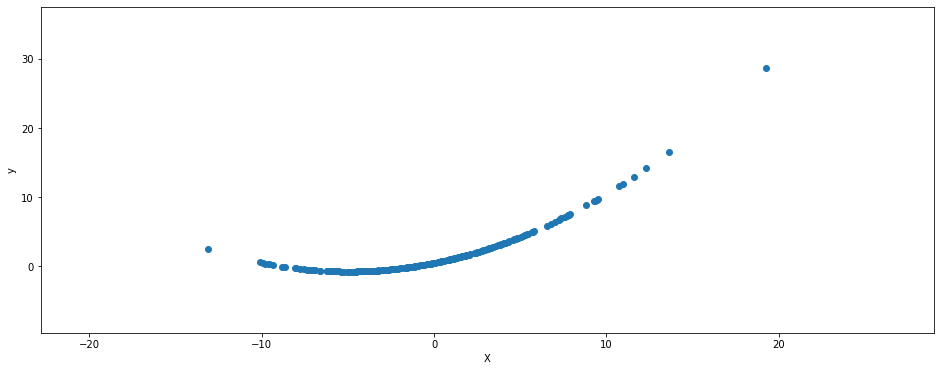

In [86]:
# Create a dataset
rnd.seed(42)

N = 250 # number of data points

X = np.random.normal(0, 5, size = (N, 1))

X_ones = np.ones_like(X)

X = np.c_[(X, X_ones)] # column-wise concatenation np/c_[((250, 1) ,(250,1))] np.hstack

print(X.shape)

# Create targets (outputs) and make them depend on X in some way
y = 0.5 * X[:, 0] + 0.05 * X[:, 0] ** 2 + 0.5
print(y.shape)

plt.figure(figsize = (16,6))
plt.scatter(X[:, 0], y)
plt.xlabel('X')
plt.ylabel('y')
plt.margins(0.3)

* $\textbf{Add some random noise}\> \mathcal{E}_n \sim \mathcal{N}(0, \sigma^2)$

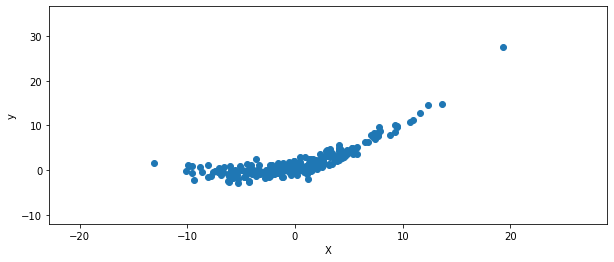

In [87]:
sigma2 = 1

Eps = np.random.normal(0, sigma2, (N)) # random noise

y += Eps # add noise to the targets

plt.figure(figsize = (10,4))
plt.scatter(X[:, 0], y)
plt.xlabel('X')
plt.ylabel('y')
plt.margins(0.3)

### $$\text{Split dataset randomly into } \textbf{train} \text{ and } \textbf{test } \text{datasets}$$
<hr>

In [88]:
# Use a function from sklearn package

from sklearn.model_selection import train_test_split

split_ratio = 0.2 # percentage 

X_tr, X_te, y_tr, y_te = train_test_split(X, y, 
                                          test_size=split_ratio, 
                                          random_state=42)

## $$\textbf{Linear regeression analytic solution}$$
<hr>

* $\text{The solution of the linear regression model is given by:}$
<hr>

$$\Large{\boxed{\beta = (X_\text{tr}^\top X_\text{tr})^{-1} X_\text{tr}^\top y_\text{tr}}}$$

* $\text{And the prediction for new "test" points by:}$
<hr>

$$\Large{\hat y_\text{te} = X_\text{te} \beta}$$

In [89]:
beta = la.inv(X_tr.T @ X_tr) @ X_tr.T @ y_tr

y_te_predict = X_te @ beta

beta

array([0.57904854, 1.78113438])

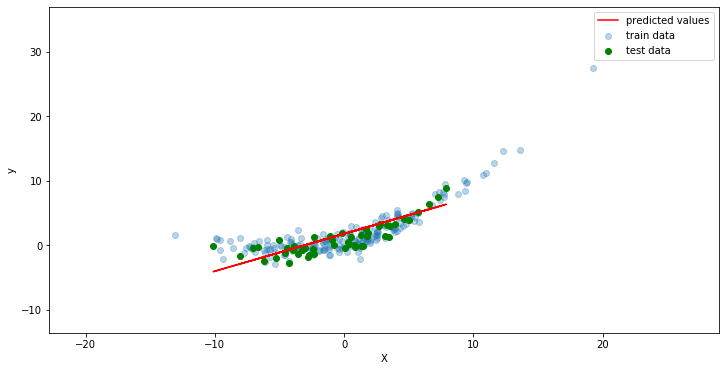

In [90]:
# Plot the data and the prediction
plt.figure(figsize = (12,6))
plt.scatter(X_tr[:, 0], y_tr, alpha=.3, label='train data')
plt.scatter(X_te[:, 0], y_te, color='g', label='test data')
plt.xlabel('X')
plt.ylabel('y')

plt.plot(X_te[:, 0],y_te_predict, '-', color='r', label='predicted values')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.margins(0.3)

* $\textbf{Compute the *root mean square error* (RMSE) for the predicted outputs:}$
<hr>

$$\text{RMSE} = \sqrt{\frac{1}{N}\sum_{n=1}^N(\hat{y}_{\text{te}_n} - y_{\text{te}_n} )^2}$$
<br>

In [91]:
rmse = np.square(y_te_predict - y_te).mean()**0.5

f"RMSE: {rmse:0.2f} where y_tr std: {np.std(y_tr):0.3f}"

'RMSE: 1.51 where y_tr std: 3.583'

## $$\textbf{Principal component analysis (PCA)}$$
<hr>



$\text{PCA is a technique widely used for applications such as}$

 * $\text{dimensionality reduction}$
 * $\text{lossy data compression}$
 * $\text{feature extraction}$
 * $\text{data visualization}$

$\text{There are two commonly used definitions of PCA:}$

 * $\text{Orthogonal projection onto lower dimensional linear space
    such that the variance of projected data is maximized.}$
    
 * $\text{Linear projection that minimizes the average projection}$
    $\text{cost, defined as the mean squared distance between the
    data and their projections.}$

## $$\textbf{Singular value decomposition (SVD)}$$
<hr>


$\text{The Singular-Value Decomposition, or SVD for short,}$

$\text{is a matrix decomposition method for reducing a matrix to its constituent parts}$

$\text{in order to make e.g. certain subsequent matrix calculations like matrix inversion simpler.}$

<br><br>

<center>
    <img src="./images/SVD.png" width='400'/>

## $$\textbf{Create a random dataset with correlated feature dependency}$$
<hr>

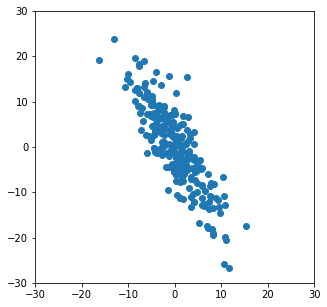

In [92]:
rnd.seed(42)
N = 250
M = np.random.normal(0, 5, (N, 2))

# create some correlation between dimensions
M[:, 1] -= 1.5 * M[:, 0]

# Plot the centered dataset
plt.figure(figsize=(5, 5))
plt.scatter(*M.T)

_=plt.axis([-30, 30, -30, 30])

## $$\textbf{Find the principal components via SVD}$$
<hr>


In [94]:
# PCA only applies to centered data, so we center the data
M -= M.mean(axis=0)

U, Sigma, V = la.svd(M, full_matrices = False)

print(Sigma)
print("U shape: ", U.shape)
print("Sigma shape:", Sigma.shape)
print("V shape:", V.shape)

X = U @ np.diag(Sigma) @ V.T # SVD reconstruction

assert np.allclose(np.sum(M - X) , 0)

[155.77368067  38.53191893]
U shape:  (250, 2)
Sigma shape: (2,)
V shape: (2, 2)


## $$\textbf{Project any point to the axis representing highest data variance}$$
<hr>


In [95]:
HAT1 = np.outer(V[0], V[0]) # 1st component
HAT2 = np.outer(V[1], V[1]) # 2d component

Mtest = rnd.uniform(-20, 20, (500, 2)) # random test data to project

# Project some test data onto the fisrt principal compenent
MtestPCA1 = Mtest @ HAT1

# Project some test data onto the second principal compenent
MtestPCA2 = Mtest @ HAT2

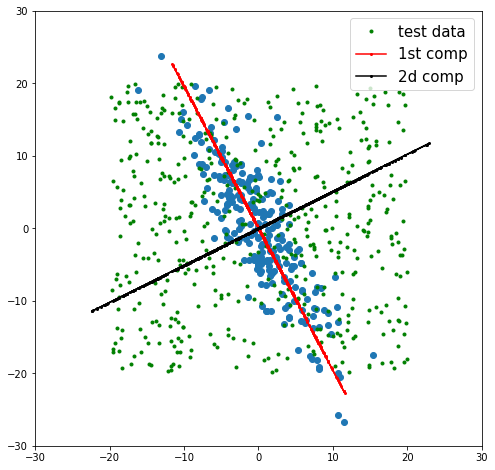

In [96]:
# Plot the original data and the projected test data
plt.figure(figsize=(8, 8))

plt.scatter(*M.T)  # equivalent to M.T[0], M.T[1]

plt.plot(*Mtest.T, '.', color='g', label='test data')
plt.plot(*MtestPCA1.T, 'o-', color='r', ms=2, label='1st comp')
plt.plot(*MtestPCA2.T, 'o-', color='k', ms=2, label='2d comp')
plt.legend(fontsize=15)
_= plt.axis([-30, 30, -30, 30])

## $$\textbf{Sklearn PCA}$$
<hr>

In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(M) # N, 100
print(Mtest.shape)

M_pr = pca.transform(Mtest)
M_pr.shape

(500, 2)


(500, 2)

## $$\textbf{Thank you for your attention.}$$